# Simple linear regression with Keras 

This notebook is similar to the sgd-intro notebook, but using a simple Keras model in place of the `upd` function to do the fitting.

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
from utils import *
rc('animation', html='html5')
%precision 4
np.set_printoptions(precision=4, linewidth=100)

Using Theano backend.


In [2]:
def lin(a,b,x): return a*x+b

In [3]:
def gen(batch_size):
    while 1:
        x = random(batch_size)
        yield x, lin(a,b,x)

In [4]:
def getmodel(lr):
    model = Sequential([
        Dense(1, input_shape=(1,))
    ])
    model.compile(optimizer=SGD(lr=lr), loss='mse')
    return model

In [5]:
a, b = 3.0, 8.0
lr=0.1
batch_size = 1
steps_per_epoch = 1000 // batch_size * batch_size

In [6]:
model = getmodel(lr)

In [7]:
model.fit_generator(gen(batch_size), steps_per_epoch, nb_epoch=2)

Epoch 1/2
1000/1000 [==============================] - 5s - loss: 0.2308     
Epoch 2/2
1000/1000 [==============================] - 5s - loss: 3.4288e-13     - - ETA: 0s - 


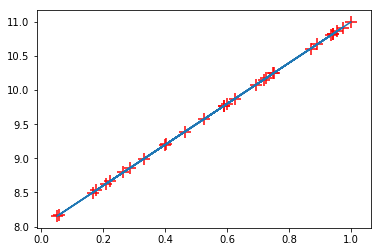

In [8]:
xs, ys = next(gen(30))
ps = model.predict(xs)
plt.scatter(xs,ys, c='r', s=128, marker='+')
_ = plt.plot(xs, ps)

## Fun with animations

In [9]:
lr=0.001 # Slow down the learning rate to make the animation more interesting.
batch_size = 16 # Increasing batch_size has a similar effect.
steps_per_epoch = 1000 // batch_size * batch_size
model = getmodel(lr)

xs, ys = next(gen(30))
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(xs, ys, c='r', s=128, marker='+')
line, = plt.plot(xs, np.zeros(len(xs)))
plt.close()

def animate(i):
    ps = model.predict(xs)
    line.set_ydata(ps)
    model.fit_generator(gen(batch_size), steps_per_epoch, nb_epoch=1, verbose=0)
    return line,

animation.FuncAnimation(fig, animate, xrange(40), interval=100)